## 1. Getting our data ready to be used with machine learning
Three main things we have to do:<br>
    1. Split the data into features and labes (usually 'x' & 'y')<br>
    2. Filling (also called inputing) or disregarding missing values<br>
    3. Converting non-numerical values to numerical value(also called feature encoding)
    

# Getting your data ready : splitting your data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x = heart_disease.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
# Split the data into training and test sets
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [7]:
x.shape

(303, 13)

In [8]:
len(heart_disease)

303

In [9]:
x.shape[0] * 0.8

242.4

# Getting your data ready : Convert Data to Numbers

In [10]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [11]:
len(car_sales)

1000

In [12]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [13]:
# split into x and y [feature matrix]

x = car_sales.drop("Price",axis=1)
y = car_sales['Price']

In [14]:
# Split into training and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [15]:
# Built machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [16]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [17]:
# Lets refit the model
np.random.seed(42)

# Split into training and test
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

In [18]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [19]:
model.score(x_test,y_test)

0.3235867221569877

# Getting your data ready : Handling Missing Values With Pandas
<br>
1. Fill them with some alue( also know as imputation).<br>
2. Remove the samples with missing data altogether

In [20]:
# Import car sales mssing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [21]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [22]:
# Create x and y
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]


In [23]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [24]:
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

### option 1 : fill missing data with Pandas

In [25]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)


# Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)


# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4,inplace=True)


In [26]:
#check our dataframe again

car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [27]:
car_sales_missing.dropna(inplace=True)

In [28]:
len(car_sales_missing)

950

In [29]:
x = car_sales_missing.drop("Price",axis=1)
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [30]:
y = car_sales_missing["Price"]
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [31]:
# Built machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2 : Fill missing values with sklearn

# Getting your data ready : Handling Missing Values With SKLearn

In [32]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [33]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [35]:
# Split into x and y

x= car_sales_missing.drop("Price",axis=1)
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [36]:
y = car_sales_missing["Price"]
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [37]:
# fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")

door_imputer = SimpleImputer(strategy="constant", fill_value=4)

num_imputer = SimpleImputer(strategy="mean")

#Define columns

cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
                           ("cat_imputer",cat_imputer, cat_features),
                           ("door_imputer", door_imputer,door_features),
                           ("num_imputer", num_imputer,num_features)])

# Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [38]:
car_sales_filled = pd.DataFrame(filled_x, columns=["Make","Colour","Door","Odometer (KM)"])

In [39]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Door             0
Odometer (KM)    0
dtype: int64

In [40]:
# Built machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Door"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [41]:
# now we have got our data as numbers and filled(no missing)
# lets fit a midel
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

# Choosing the right model for your data

In [42]:
# Classification problem - predicting a category (heart disease or not)
# Regression problem - predicting a number( selling of a car)

# Sklearn machine learning map

### picking a machine learning model for a regression model

In [43]:
# get california housing data

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [44]:
housing_df = pd.DataFrame(housing["data"], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [45]:
housing_df["MedHouseVal"]=housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [46]:
housing_df = housing_df.drop("MedHouseVal",axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [47]:
housing_df["target"]=housing["target"]

housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [48]:
# split the data into features(x) and target(y)
x = housing_df.drop("target",axis=1)
y = housing_df["target"]


In [49]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [50]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [52]:
#RidgeRegression
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train, y_train)

# Check the score on the test set
model.score(x_test,y_test)

0.6017138339794648

In [53]:
#Support Vector Regression
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)
model.score(x_test,y_test)

-0.02728718659810392

In [54]:
# svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
# svr_rbf.fit(x_train, y_train)
# svr_rbf.score(x_test,y_test)

In [55]:
# svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
# svr_poly.fit(x_train, y_train)
# svr_poly.score(x_test,y_test)
# svr_lin = SVR(kernel="linear", C=100, gamma="auto")
# svr_lin.fit(x_train, y_train)
# svr_lin.score(x_test,y_test)

In [56]:
# Ensemble Model : a combination of smaller model to try and make better model
# RandomForestRegressor
# RandomForestClassifier

In [57]:
# RandomeForestRegressor from ensmeble model
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("target",axis=1)
y = housing_df["target"]

#split into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Create random ForestModel
model = RandomForestRegressor()
model.fit(x_train, y_train)

model.score(x_test,y_test)


0.8065734772187598

### Picking a model for classification problem

In [58]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
len(heart_disease)

303

In [60]:
#LinearSVC
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

#make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Instantiate LinearSVC
model = LinearSVC()
model.fit(x_train, y_train)

# Evaluate the LinearSVC
model.score(x_test, y_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [61]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [62]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Instantiate LinearSVC
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Evaluate the LinearSVC
model.score(x_test, y_test)

0.8524590163934426

# Making Predictions with our Model 

In [63]:
# Use a trained model to make predictions
# predict() and predict_proba()
model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [64]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [65]:
# Compare predictions to truth labels to evaluate the model
y_preds = model.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [67]:
# make predictions with predict_proba()
# it returns probabilities of a classification label
model.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [68]:
model.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [69]:
np.array(y_test[:5])

array([0, 0, 1, 0, 1], dtype=int64)

In [70]:
# from sklearn.metrics import mean_absolute_error
# mean_absolute_error(y_test, y_preds)


# Evaluating a Machine Model

In [71]:
# three ways to evaluate
# 1. score()
# 2. scoring
# 3. Metric function

In [72]:
# score method
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestClassifier()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8524590163934426

In [73]:
# Scoring parameters (Cross Validation)
from sklearn.model_selection import cross_val_score
cross_val_score(model,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [74]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [75]:
np.random.seed(42)

#Single training and test split score
clf_single_score = model.score(x_test, y_test)

#take the mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(model,x,y))

#compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [76]:
# Default scoring parameter of classifier = mean accuracy
# cross_val_score(model,x,y, cv=5, scoring=None)

metric functions<br>
    1. accuracy<br>
    2. area under ROC curve<br>
    3. confusion matrix<br>
    4. classification report<br>

In [77]:
# 1. ACCURACY

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, x, y)

In [78]:
np.mean(cross_val_score)

0.8248087431693989

In [79]:
# 2. area under the reciever characteristics curve(AUC/ROC)
    # 1. Area Under curve(AUC)
    # 2. ROC CURVE : comparison of a model's true positive rate(tpr) versus a models false positive rate(fpr).
        # 1. True Positive = model predicts 1 when truth is 1
        # 2. False Positive = model predicts 1 when truth is 0
        # 3. True Negetive = model predicts 0 when truth is 0
        # 4. False Negetive = model predicts 0 when truth is 1

In [80]:
from sklearn.metrics import roc_curve

# make predictions with probabilities
clf.fit(x_train, y_train)
y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.87, 0.13],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.14, 0.86],
       [0.4 , 0.6 ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.43, 0.57]])

In [81]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57])

In [82]:
# calculate fpr, tpr and thresholds
fpr,tpr, thresholds = roc_curve(y_test, y_probs_positive)

#check the false positive return
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
       0.34482759, 0.4137931 , 0.51724138, 0.5862069 , 0.65517241,
       0.65517241, 0.72413793, 0.82758621, 0.89655172, 0.93103448,
       1.        ])

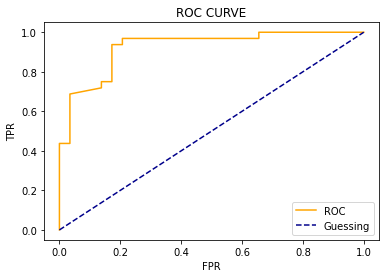

In [83]:
# create a function for plotting ROC Curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    # plot roc curve
    plt.plot(fpr,tpr, color="orange",label="ROC")
    
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue", linestyle="--",label="Guessing")

    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC CURVE")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [84]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9251077586206896

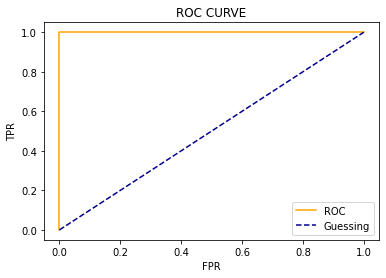

In [85]:
# Plot perfect ROC CURVE and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [86]:
# perfect AUC score
roc_auc_score(y_test, y_test)

1.0

In [87]:
# 3. Confusion matrix 
# A confusion matrix is a quick way to compare the labels predicts and the actual labels it was supposed to predict
# in essence, giving you an idea of where the model is getting confused

In [88]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [89]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Label"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,24,5
1,4,28


<AxesSubplot:>

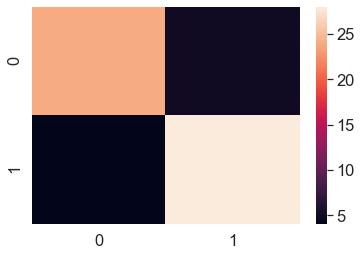

In [90]:
# make our confusion matrix more visual with seaborns heatmap()
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# plot it using seaborn
sns.heatmap(conf_mat)

In [91]:
# Creatinga confusion matrix using Scikit-Learn
import sklearn
sklearn.__version__

'1.1.2'

In [92]:
# from estimator
# from predictors

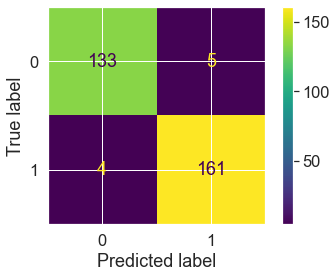

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, x,y)

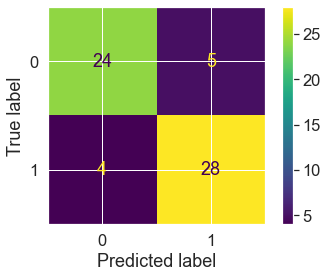

In [95]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [96]:
# 4. Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [97]:
# where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1
disease_preds = np.zeros(10000)
pd.DataFrame(classification_report(disease_true,disease_preds, output_dict=True))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


# Evaluating a Regression Model

In [98]:
# 1. R^2 or coefficient of determination
# 2. Mean absolute error
# 3. Mean squared error

In [99]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [100]:
model.score(x_test,y_test)

0.8065734772187598

In [101]:
y_test.mean()

2.0550030959302275

In [102]:
from sklearn.metrics import r2_score


In [104]:
#fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [105]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [108]:
r2_score(y_test,y_test_mean)

0.0

In [110]:
r2_score(y_test, y_test)

1.0

In [111]:
# 2. Mean Absolute Error
# MAE is the average of the absolute differences between predictions and actual values
# It gives you an idea of how wrong your models predictions are

In [112]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [113]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [114]:
df = pd.DataFrame(data={"actual values" : y_test, "Predicted Values":y_preds})
df['differences'] = df["Predicted Values"]-df["actual values"]

In [115]:
df.head()

,actual values,Predicted Values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [117]:
np.abs(df["differences"]).mean()

0.32659871732073803

In [118]:
# Mean Squared Error
# MSE is the mean of the errors between actual and preedicted values

In [119]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [120]:
df["squared_difference"] = np.square(df["differences"])

In [121]:
df.head()

,actual values,Predicted Values,differences,squared_difference
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [123]:
squared = np.square(df["differences"])
squared.mean()

0.25346785208245565

In [128]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_difference"]
# df.iloc[0]["squared_difference"] = 16

0.0002835856000000063

In [129]:
df_large_error.head()

,actual values,Predicted Values,differences,squared_difference
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
